# Data exploration

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import skew, norm, probplot

sns.set(rc={'figure.figsize':(11.7,6.27)})

In [2]:
# Read Dat
df_train = pd.read_csv("train.csv")

# Remove ID
df_train = df_train.drop('Id',1)

# find features
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index


In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

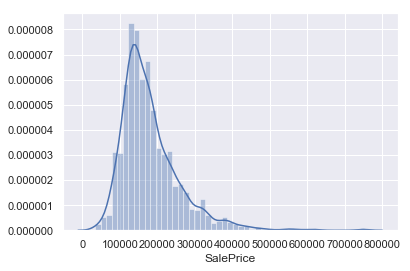

In [5]:
sns.distplot(df_train["SalePrice"], kde=True)

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [7]:
df_train.columns.to_series().groupby(df_train.dtypes).groups

{dtype('int64'): Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtC

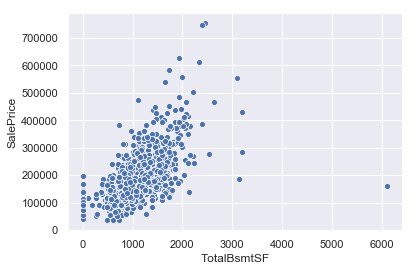

In [8]:
name= df_train.columns[7]
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df_train)

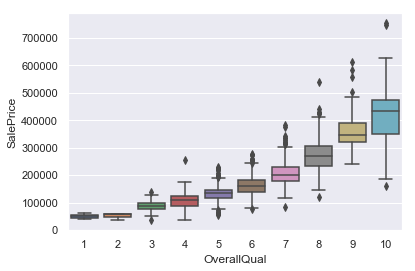

In [9]:
sns.boxplot(x='OverallQual',y='SalePrice',data=df_train)

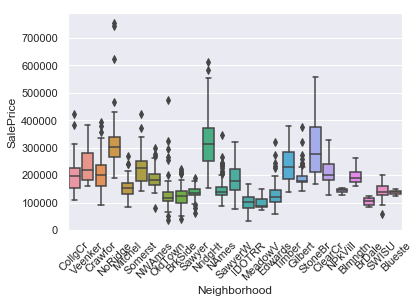

In [10]:
g = sns.boxplot(x='Neighborhood',y='SalePrice',data=df_train)
g = g.set_xticklabels(g.get_xticklabels(), rotation=45)

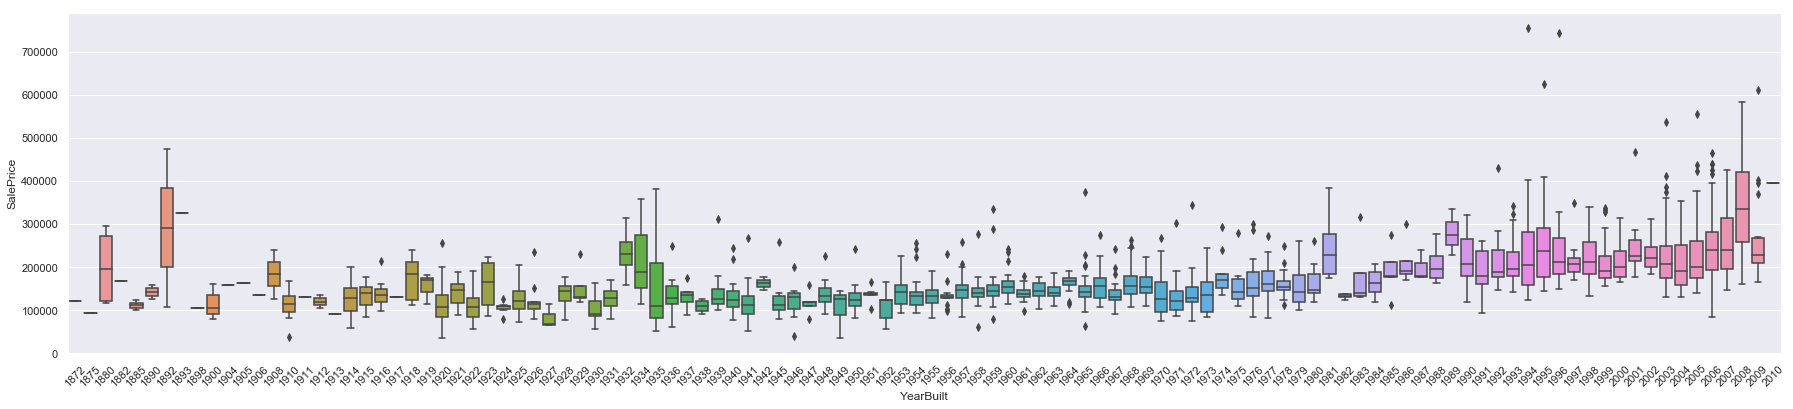

In [11]:
sns.set(rc={'figure.figsize':(30.7,6.27)})
g = sns.boxplot(x='YearBuilt',y='SalePrice',data=df_train)
g = g.set_xticklabels(g.get_xticklabels(), rotation=45)
sns.set(rc={'figure.figsize':(11.7,6.27)})

## Correlation Study

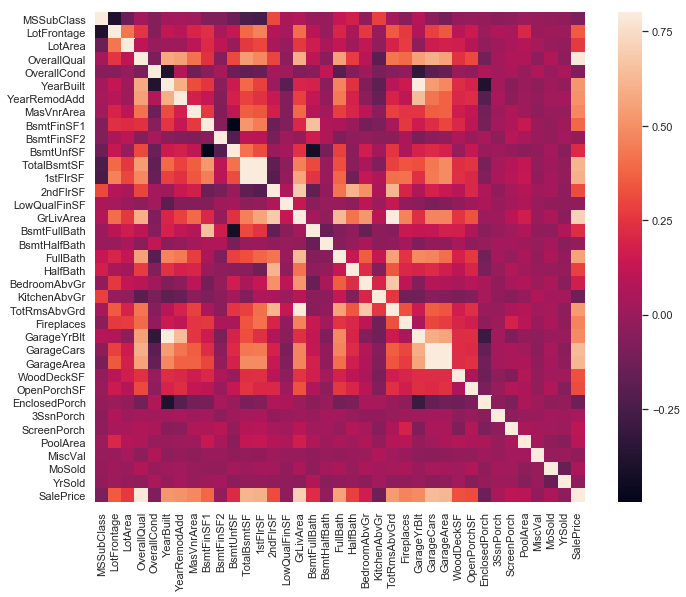

In [12]:
#correlation matrix
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [14]:
corrmat.loc[corrmat['SalePrice']>0.5,'SalePrice'][:-1].sort_values(ascending=False)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Look at the features near diameter. TotalBsmtSF/FirstFlrSQ and GarageCars/GarageArea are highly correlated. 

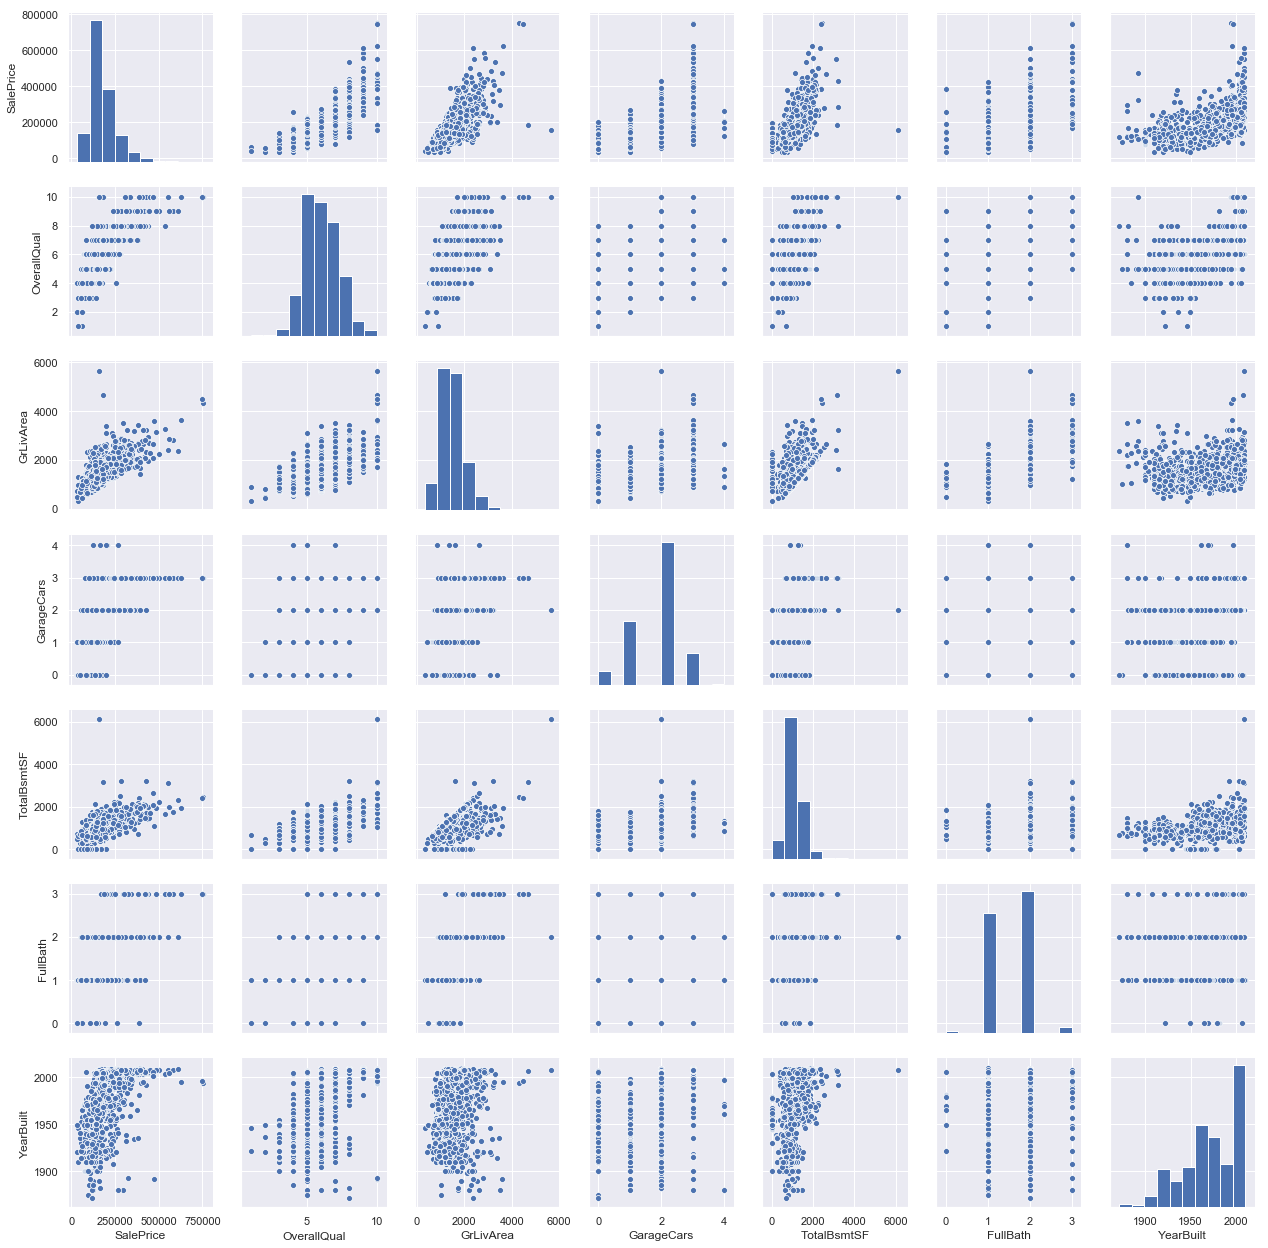

In [15]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

## Missing Data

In [16]:
total =df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [21]:
#dealing with missing data
df_train_tidy = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train_tidy = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train_tidy.isnull().sum().max() 

1452

## Skweness

In [22]:
#log transform skewed numeric features:
skewed_feats = df_train_tidy[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75].index
df_train_tidy[skewed_feats] = np.log1p(df_train_tidy[skewed_feats])

C:\python\miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


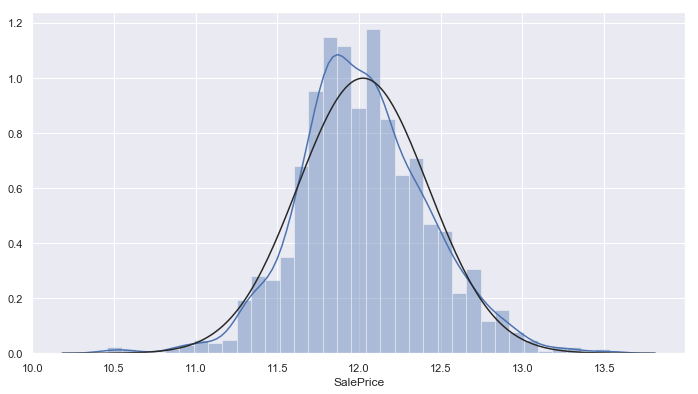

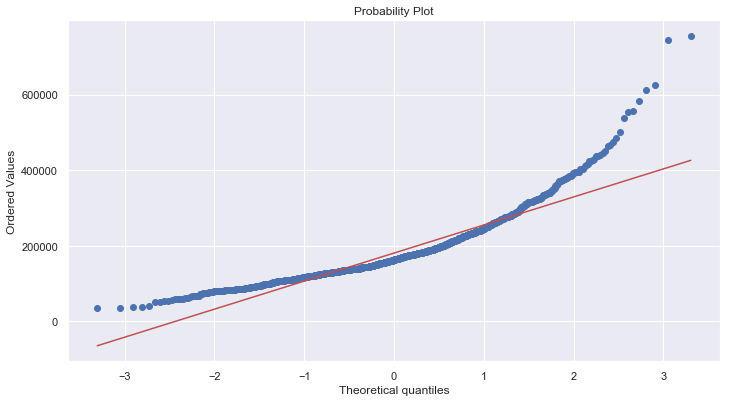

In [25]:
sns.distplot(df_train_tidy['SalePrice'],fit=norm)
fig = plt.figure()
res = probplot(df_train['SalePrice'],plot=plt)

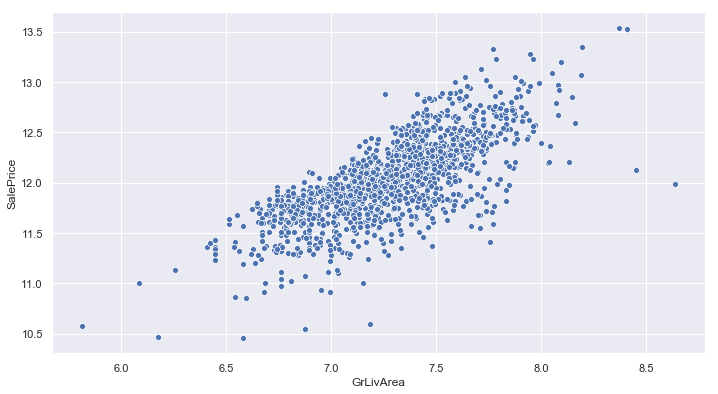

In [28]:
var= 'GrLivArea'
df_train_tidy = df_train_tidy.loc[(df_train_tidy[var]<4000) & (df_train_tidy['SalePrice']<700000),]
sns.scatterplot(x = df_train_tidy[var],y=df_train_tidy['SalePrice'])

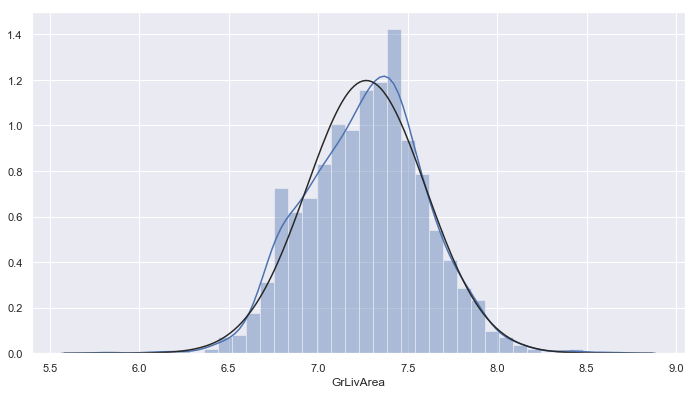

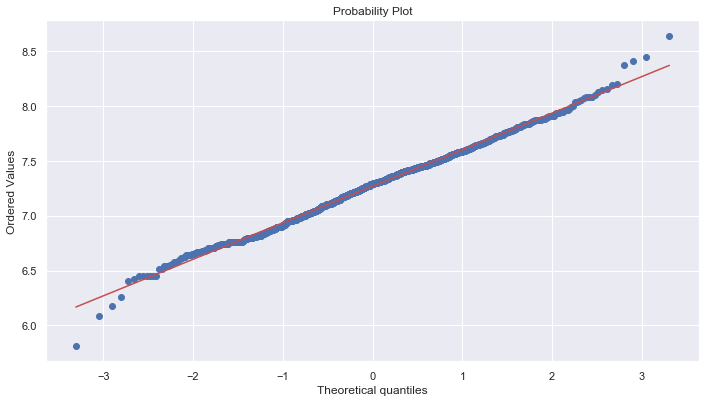

In [31]:
sns.distplot(df_train_tidy['GrLivArea'],fit=norm)
fig = plt.figure()
res = probplot(df_train_tidy['GrLivArea'],plot=plt)

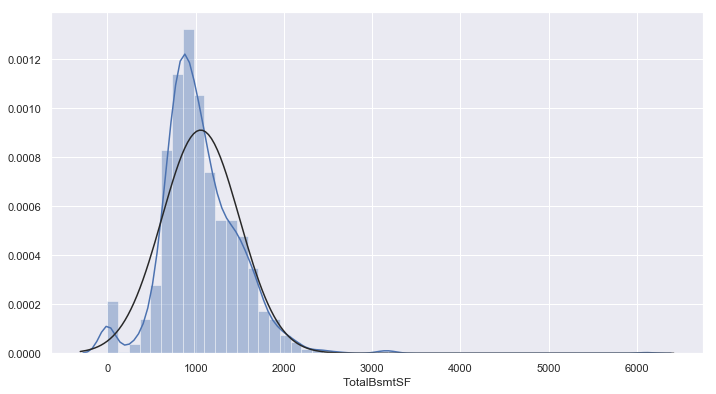

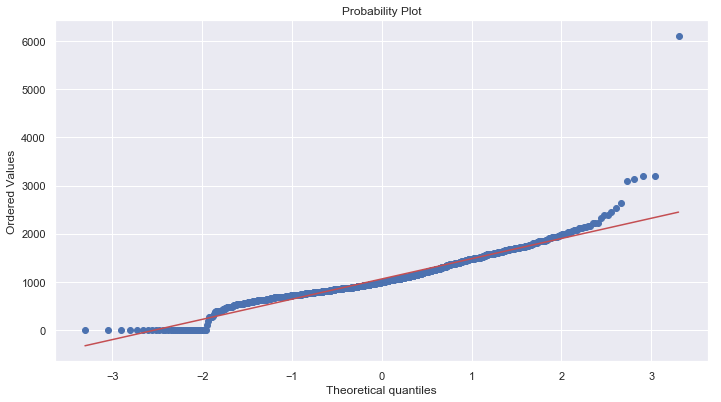

In [34]:
sns.distplot(df_train['TotalBsmtSF'],fit=norm)
fig = plt.figure()
res = probplot(df_train['TotalBsmtSF'],plot=plt)

In [35]:
sns.distplot(df_train_tidy.loc[idx,'TotalBsmtSF_log'],fit=norm)
fig = plt.figure()
res = probplot(df_train_tidy.loc[idx,'TotalBsmtSF_log'],plot=plt)

NameError: name 'idx' is not defined

## Homoscedasticity 

In [ ]:
# TODO
categorical_feats

## Categorical

In [ ]:

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
df_train['YearBuilt'].dtypes

## Pre-processing pipelines

In [10]:
from __future__ import print_function

import pandas as pd
import numpy as np
from math import sqrt

# Preprocessing 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer, OneHotEncoder

# Model reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# Regressors 
from sklearn.linear_model import Ridge, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

# Model selection and validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
from sklearn.base import TransformerMixin,BaseEstimator

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)
            
#cs = ColumnSelector(columns=["state", "account length", "area code"])
#cs.fit_transform(df).head()

class SkewCorrection(BaseEstimator, TransformerMixin):
    def __init__(self, limit=0.75):
        self.limit = limit

    def fit(self, X, y=None):
        self.idx = skew(X)>self.limit
        return self

    def transform(self, X):
        X[:,self.idx] = np.log1p(X[:,self.idx]) # Using log1p to account for 0 inputs
        return X
    
    
class RemoveOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, limit=0.75):
        self.limit = limit

    def fit(self, X, y=None):
        self.idx = skew(X)>self.limit
        return self

    def transform(self, X):
        X[:,self.idx] = np.log1p(X[:,self.idx]) # Using log1p to account for 0 inputs
        return X    

In [12]:
pi = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('skew', SkewCorrection(limit=0.75))])
a = pi.fit_transform(df_train[numeric_feats])

### Numerical and categorical features

In [13]:
# We create the preprocessing pipelines for both numeric and categorical data.
# Considered
# ('nonlinear', PowerTransformer(method='yeo-johnson', standardize=False)),
# ('pca',PCA())

numeric_features = numeric_feats.drop('SalePrice')#['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd','GarageYrBlt','TotRmsAbvGrd']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('skew', SkewCorrection(limit=0.75)),
    ('scaler', RobustScaler())])

categorical_features = categorical_feats
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## Estimation pipelines

In [14]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', Ridge())])

x = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

pipeline.fit(x_train, y_train)
print("model R2 score: %.3f" % pipeline.score(x_valid, y_valid))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_valid,pipeline.predict(x_valid))))

kfold = 5
scoring = ['r2','neg_mean_squared_error']
results = cross_validate(pipeline, x, y, cv=kfold, return_train_score=True,scoring=scoring)
results


model R2 score: 0.868
RMSE: 31766.470


{'fit_time': array([0.54005003, 0.42423129, 0.46154618, 0.65524077, 0.43497086]),
 'score_time': array([0.0170691 , 0.01438379, 0.02909565, 0.01399875, 0.03051496]),
 'test_r2': array([0.88720874, 0.84123154, 0.85571264, 0.86753754, 0.71921   ]),
 'train_r2': array([0.91319584, 0.91986651, 0.91923182, 0.91707518, 0.92656014]),
 'test_neg_mean_squared_error': array([-6.24032270e+08, -1.04321512e+09, -1.09338044e+09, -6.71035582e+08,
        -1.88280068e+09]),
 'train_neg_mean_squared_error': array([-5.64237431e+08, -4.99992873e+08, -4.83386296e+08, -5.47118540e+08,
        -4.55811540e+08])}

## Model Selection

In [15]:
regressors = {
    'Ridge': Ridge(),
    'Lasso': Lasso(alpha=0.1,max_iter=1000,tol=0.0001),
    'ElasticNet': ElasticNet(alpha=0.05, l1_ratio=.9, random_state=3),
    'KernelRidge': KernelRidge(),
    'GradBoost': GradientBoostingRegressor(),
    'RandForest': RandomForestRegressor()
}

kfold = 5
scoring = ['r2','neg_mean_squared_error'] # Change scoring to R2 and RMSE
for name, reg in regressors.items():
    steps=[('preprocessor', preprocessor),
           ('regressor', reg)]
    pipeline = Pipeline(steps)
    
    results = cross_validate(pipeline, x, y, cv=kfold, 
                             return_train_score=True, return_estimator=False, 
                             scoring=scoring,
                             n_jobs=-1) # Change the n_jobs to -1 to use all the cpus for calculation
    
    print('PL: {:<15} | test_score: {:1.4f} | train_score: {:1.4f} |\
    test_rmse: {:.4f} | fit_time: {:2.4f} | score_time: {:1.4f}'.format(name,
                                                                        np.mean(results['test_r2']),
                                                                        np.mean(results['train_r2']),
                                                                        sqrt(-np.mean(results['test_neg_mean_squared_error'])),                                                      
                                                                        np.mean(results['fit_time']),
                                                                        np.mean(results['score_time'])))  
print('Done!')    

PL: Ridge           | test_score: 0.8342 | train_score: 0.9192 |    test_rmse: 32600.9467 | fit_time: 0.6885 | score_time: 0.0353
PL: Lasso           | test_score: 0.8119 | train_score: 0.9281 |    test_rmse: 34729.7905 | fit_time: 2.7409 | score_time: 0.0334
PL: ElasticNet      | test_score: 0.8443 | train_score: 0.9066 |    test_rmse: 31619.6503 | fit_time: 0.6902 | score_time: 0.0375
PL: KernelRidge     | test_score: 0.8333 | train_score: 0.9209 |    test_rmse: 32687.9962 | fit_time: 0.4722 | score_time: 0.1605
PL: GradBoost       | test_score: 0.8817 | train_score: 0.9699 |    test_rmse: 27397.5596 | fit_time: 1.4461 | score_time: 0.0520
PL: RandForest      | test_score: 0.8472 | train_score: 0.9742 |    test_rmse: 31107.9363 | fit_time: 1.9506 | score_time: 0.0486
Done!


## Hyper parameter tuning
We choose Gradient boosting algorithm here.

In [16]:
steps=[('preprocessor', preprocessor),
       ('regressor', GradientBoostingRegressor())]
pipeline = Pipeline(steps)
pipeline.steps[1]

('regressor',
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False))

In [17]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'regressor__alpha': [0.001,0.01,0.1,0.3],
    'regressor__n_estimators': [100,200,300],
    'regressor__max_depth': [3,6,9]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, iid=False)
grid.fit(x,y)

# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.894074 using {'preprocessor__num__imputer__strategy': 'mean', 'regressor__alpha': 0.001, 'regressor__max_depth': 3, 'regressor__n_estimators': 300}
0.884910 (0.023282) with: {'preprocessor__num__imputer__strategy': 'mean', 'regressor__alpha': 0.001, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
0.890254 (0.026166) with: {'preprocessor__num__imputer__strategy': 'mean', 'regressor__alpha': 0.001, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
0.894074 (0.023791) with: {'preprocessor__num__imputer__strategy': 'mean', 'regressor__alpha': 0.001, 'regressor__max_depth': 3, 'regressor__n_estimators': 300}
0.865145 (0.035656) with: {'preprocessor__num__imputer__strategy': 'mean', 'regressor__alpha': 0.001, 'regressor__max_depth': 6, 'regressor__n_estimators': 100}
0.864363 (0.038940) with: {'preprocessor__num__imputer__strategy': 'mean', 'regressor__alpha': 0.001, 'regressor__max_depth': 6, 'regressor__n_estimators': 200}
0.859183 (0.046372) with: {'preprocesso

## Plot importatnt features

In [ ]:
# Plot important coefficients
coefs = pd.Series(clf.steps[1][1].coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('nonlinear', PowerTransformer(method='yeo-johnson', standardize=True)),
    ('scaler', StandardScaler())])
pip1 = numeric_transformer.fit(df_train[['OverallQual', 'GrLivArea']], df_train['SalePrice'])
res = pip1.transform(df_train[['OverallQual', 'GrLivArea']])

In [ ]:
sns.distplot(df_train['TotalBsmtSF'],fit=norm)

In [ ]:
sns.distplot(res[:,1],fit=norm)

# Prediction

In [18]:
df_test = pd.read_csv("test.csv")

y_pred = grid.predict(df_test.drop('Id',1))
y_pred

array([121104.26507022, 163850.39614676, 184955.83318913, ...,
       156857.11844398, 119465.67907772, 226249.42950363])

## Save Model

In [ ]:
from sklearn.externals import joblib 

joblib.dump(clf, 'my_regressor.pkl')

## Submission

In [19]:
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)